<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16()
print(model.summary())

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras.preprocessing import image
from keras.utils import to_categorical, load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

img = load_img('/content/dog-puppy-on-garden-royalty-free-image-1586966191.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)

1/1 [==============================] - 1s 1s/step


In [ ]:
#VGG16
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical, load_img, img_to_array

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load input image
img_path = '/content/Sphynx.jpg'
img = load_img(img_path, target_size=(224, 224))

# Convert image to numpy array
x = img_to_array(img)

# Expand array dimensions to fit model input shape
x = np.expand_dims(x, axis=0)

# Preprocess image data
x = preprocess_input(x)

# Make predictions
preds = model.predict(x)

# Decode predictions to class labels
decoded_preds = decode_predictions(preds, top=5)[0]

# Print top 5 predicted class labels and their probabilities
for label in decoded_preds:
    print('%s: %.2f%%' % (label[1], label[2]*100))

1/1 [==============================] - 1s 730ms/step
piggy_bank: 32.08%
Chihuahua: 16.97%
Egyptian_cat: 7.53%
Mexican_hairless: 3.76%
wood_rabbit: 3.23%


35363/35363 [==============================] - 0s 0us/step
sports_car: 0.99
racer: 0.01
convertible: 0.00


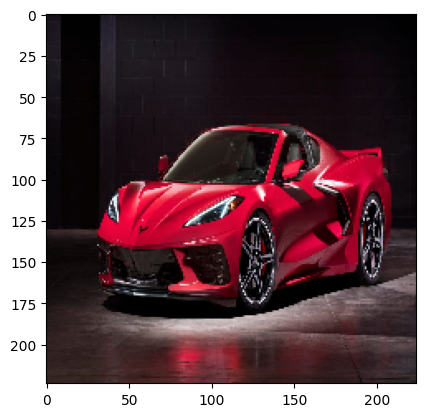

In [1]:
#ResNet
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# load the ResNet50 model
model = ResNet50()

# load and preprocess the image
img = load_img('/content/0x0.jpg', target_size=(224, 224))
plt.imshow(img)
img = preprocess_input(np.expand_dims(img, axis=0))

# make predictions
preds = model.predict(img)

# decode the predictions
decoded_preds = decode_predictions(preds, top=3)[0]

# display the predicted class names and probabilities
for class_id, class_name, score in decoded_preds:
    print(f"{class_name}: {score:.2f}")

In [ ]:
pip install selectivesearch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=62bf936cc403b91c6215b72d345ca674eb77c335d54ffc060d9c0d38e21f314f
  Stored in directory: /root/.cache/pip/wheels/dd/5d/c1/1f9a5d313a93983d5d76cd3f1a4adb286a17176e65c6f704cb
Successfully built selectivesearch


In [ ]:
#R_CNN
import numpy as np
import cv2
import selectivesearch
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from skimage.transform import resize
from selectivesearch import selective_search

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Add top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Combine base model and top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model with optimizer, loss function and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load input image
img_path = '/content/cat.jpg'
img = cv2.imread(img_path)

# Perform selective search on input image to get candidate object regions
rects = selective_search(img, scale=500, sigma=0.9, min_size=10)

# Extract feature vectors for candidate object regions
features = []
for rect in rects:
    x, y, w, h, _ = rect
    if w < 10 or h < 10:
        continue
    roi = img[y:y+h, x:x+w]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = resize(roi, (224, 224))
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)
    roi = preprocess_input(roi)
    feature = model.predict(roi)
    features.append((rect, feature))

# Use classification model to predict labels for candidate object regions
labels = []
for feature in features:
    rect, feature_vec = feature
    label_vec = model.predict(feature_vec)
    label = np.argmax(label_vec)
    labels.append((rect, label))

# Display results
for rect, label in labels:
    x, y, w, h = rect
    if label == 1:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    else:
        cv2.rectangle


ValueError: ignored